In [ ]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

zip_path = tf.keras.utils.get_file(
    origin='https://drive.google.com/uc?export=download&id=1y3Scq2UT7ffeku5orXLjfe-ATZzhtEpP',
    fname='Usable_data.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)

df = pd.read_csv(csv_path)
df = df[0::1]
# df.fillna(0, None, 0, True)
df = df.interpolate(method='linear', axis=0).bfill()

date_time = pd.to_datetime(df.pop('date'), format='%Y-%m-%d')

df.head()



,precipitation,censo_long,espi,nina34_anom,nina4_anom,oni,censo,meiv2,nina1_anom,nina3_anom,...,pna,wp,ipotpi_hadisst2,qbo,eofpac,np,solar,swmonsoon,gmsst,trend
0,16.96,-0.75,1.01533,-1.99,-1.38,-1.53,-0.74,0.47,-1.55,-2.10,...,-3.65,-1.69,-1.12,-8.99,-1.053,1014.87,1507,0.58,-0.22,25.0
1,9.61,-1.71,1.01533,-1.69,-1.53,-1.34,-1.70,0.47,-1.78,-1.52,...,-1.69,-1.36,-1.38,-11.37,-2.044,1010.40,1433,0.73,-0.26,26.0
2,8.76,-1.43,1.01533,-1.42,-1.80,-1.16,-1.43,0.47,-1.38,-0.84,...,-0.06,-0.38,-1.09,-10.63,-1.034,1008.13,1378,0.39,-0.02,27.0
3,12.64,-1.30,1.01533,-1.54,-1.73,-1.18,-1.29,0.47,-1.90,-1.14,...,-0.23,-0.50,-1.10,-8.19,-1.597,1015.49,1643,0.23,-0.21,28.0
4,5.23,-1.24,1.01533,-1.75,-1.18,-1.07,-1.22,0.47,-1.74,-1.57,...,-0.40,0.23,-1.28,-6.09,-1.669,1015.47,1571,0.13,-0.21,29.0


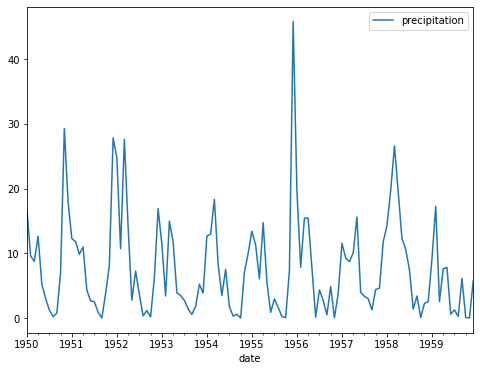

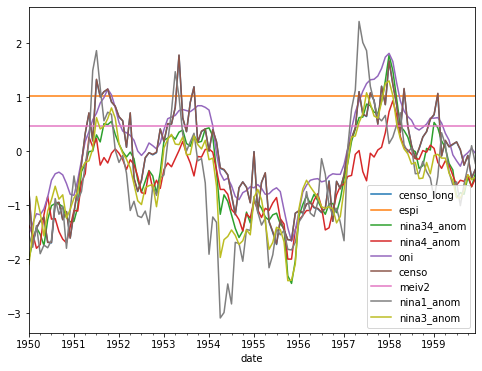

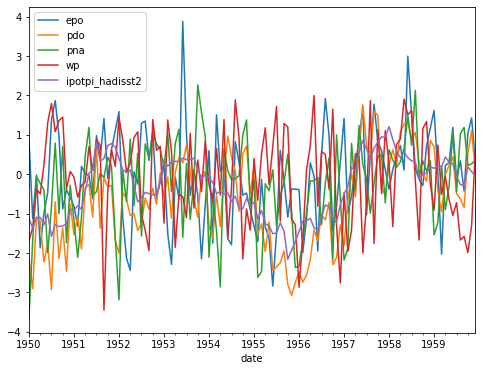

In [ ]:

plot_precip = ['precipitation']
plot_ENSO = ['censo_long', 'espi', 'nina34_anom', 'nina4_anom', 'oni', 'censo', 'meiv2', 'nina1_anom', 'nina3_anom'] #tni
plot_osc = ['epo', 'pdo', 'pna', 'wp', 'ipotpi_hadisst2'] #noi, qbo
# plot_cols = ['precipitation', 'censo_long', 'espi', 'nina34_anom', 'nina4_anom', 'oni', 'censo', 'meiv2', 'nina1_anom', 'nina3_anom', 'tni', 'epo', 'noi', 'pdo', 'pna', 'wp', 'ipotpi_hadisst2', 'qbo', 'eofpac', 'np', 'solar', 'swmonsoon', 'gmsst', 'trend']
# plot_features = df[plot_cols]
# plot_features.index = date_time
# _ = plot_features.plot(subplots=True)

plot_features = df[plot_precip][:120]
plot_features.index = date_time[:120]
_ = plot_features.plot(subplots=False)

plot_features = df[plot_ENSO][:120]
plot_features.index = date_time[:120]
_ = plot_features.plot(subplots=False)

plot_features = df[plot_osc][:120]
plot_features.index = date_time[:120]
_ = plot_features.plot(subplots=False)

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
precipitation,852.0,8.484660,8.864082,0.00000,1.877500,5.64500,12.30750,56.16000
censo_long,852.0,0.199554,0.873717,-2.45000,-0.360000,0.43000,0.61000,3.07000
espi,852.0,0.411793,0.915022,-2.05964,-0.371287,0.99746,1.01533,3.76707
nina34_anom,852.0,-0.177465,0.872668,-2.45000,-0.782500,-0.25000,0.36000,2.72000
nina4_anom,852.0,-0.258075,0.683617,-2.21000,-0.740000,-0.19000,0.24000,1.44000
oni,852.0,0.021420,0.829645,-2.03000,-0.542500,-0.03000,0.54000,2.64000
censo,852.0,0.051725,0.998633,-3.07000,-0.560000,0.04000,0.71000,3.08000
meiv2,852.0,0.192077,0.776501,-2.43000,-0.250000,0.47000,0.47000,2.89000
nina1_anom,852.0,-0.264143,1.085106,-3.09000,-1.010000,-0.41500,0.30000,4.47000
nina3_anom,852.0,-0.216408,0.899280,-2.40000,-0.840000,-0.30500,0.29250,3.30000


In [ ]:
timestamp_s = date_time.map(pd.Timestamp.timestamp)
timestamp_s[:24]

0    -631152000.0
1    -628473600.0
2    -626054400.0
3    -623376000.0
4    -620784000.0
5    -618105600.0
6    -615513600.0
7    -612835200.0
8    -610156800.0
9    -607564800.0
10   -604886400.0
11   -602294400.0
12   -599616000.0
13   -596937600.0
14   -594518400.0
15   -591840000.0
16   -589248000.0
17   -586569600.0
18   -583977600.0
19   -581299200.0
20   -578620800.0
21   -576028800.0
22   -573350400.0
23   -570758400.0
Name: date, dtype: float64

In [ ]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

In [ ]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

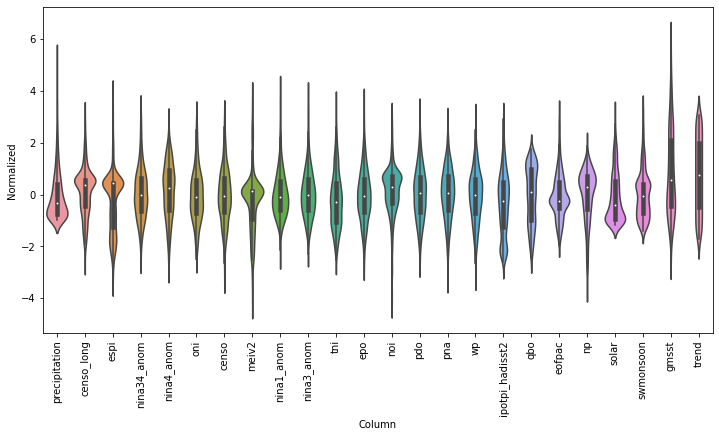

In [ ]:
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

# Data Windowing

In [ ]:
# @title WindowGenerator

class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [ ]:
# Creating windows

w1 = WindowGenerator(input_width=7, label_width=5, shift=5,
                     label_columns=['precipitation'])
w1

Total window size: 12
Input indices: [0 1 2 3 4 5 6]
Label indices: [ 7  8  9 10 11]
Label column name(s): ['precipitation']

In [ ]:
# @title Split Window

def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [ ]:
# # Stack three slices, the length of the total window.

# Expected 24 features EVERYTHING HERE IS CORRECT

example_window = tf.stack([np.array(train_df[:w1.total_window_size]),
                           np.array(train_df[100:100+w1.total_window_size]),
                           np.array(train_df[200:200+w1.total_window_size])])

example_inputs, example_labels = w1.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 12, 24)
Inputs shape: (3, 7, 24)
Labels shape: (3, 5, 1)


In [351]:
# @title Plot

def plot(self, model=None, plot_col='precipitation', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(24, 16))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    # plt.scatter(self.label_indices, labels[n, :, label_col_index],
    #             edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [m]')

WindowGenerator.plot = plot

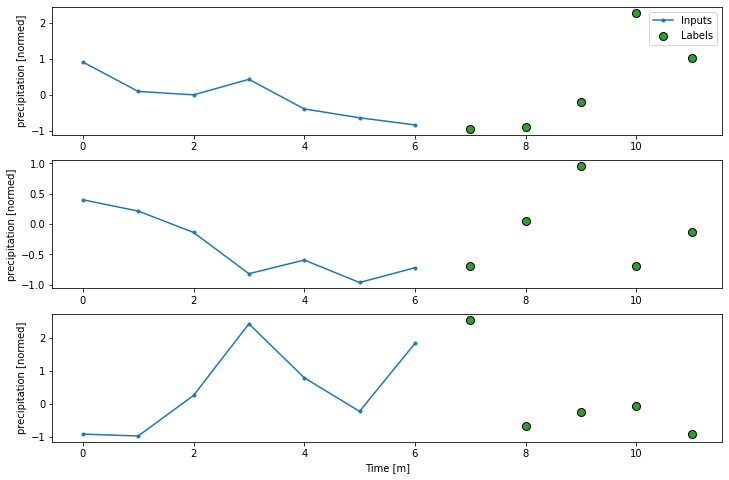

In [ ]:
w1.example = example_inputs, example_labels
w1.plot()

# Datasets


In [ ]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [ ]:
# @title Functions

@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [ ]:
# # Each element is an (inputs, label) pair.
# w1.train.element_spec

In [ ]:
# for example_inputs, example_labels in w1.train.take(1):
#   print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
#   print(f'Labels shape (batch, time, features): {example_labels.shape}')

In [ ]:
# @title Baseline

class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [ ]:
# @title Baseline Instantiation and Evaluation

baseline = Baseline(label_index=column_indices['precipitation'])

baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                 metrics=[tf.keras.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
# val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
# performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

In [330]:
# @title Wide Window

wide_window = WindowGenerator(
    input_width=120, label_width=120, shift=1,
    label_columns=['precipitation'])

wide_window

Total window size: 121
Input indices: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]
Label indices: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 

In [332]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 120, 24)
Output shape: (32, 120, 1)


All shapes are: (batch, time, features)
Window shape: (3, 12, 24)
Inputs shape: (3, 12, 24)
Labels shape: (3, 12, 1)


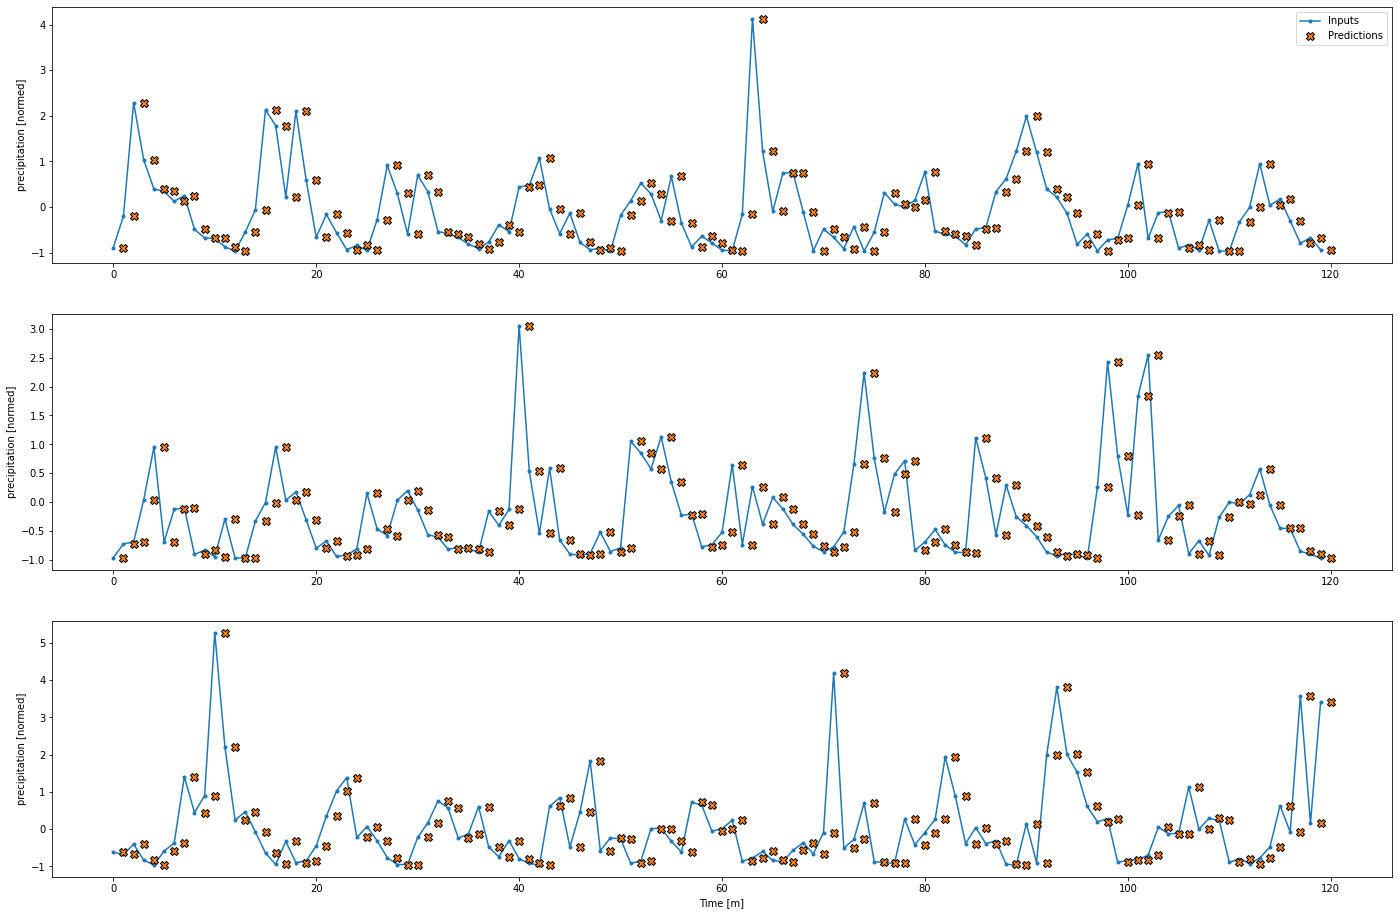

In [352]:
ww=tf.stack([np.array(train_df[:wide_window.total_window_size]),
             np.array(train_df[100:100+wide_window.total_window_size]),
             np.array(train_df[200:200+wide_window.total_window_size])])
wwinputs, wwlabels = wide_window.split_window(ww)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')
wide_window.plot(baseline)

In [266]:
# MAX_EPOCHS = 100

# def compile_and_fit(model, window, patience=2):
#   early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
#                                                     patience=patience,
#                                                     mode='min')

#   model.compile(loss=tf.keras.losses.MeanSquaredError(),
#                 optimizer=tf.keras.optimizers.Adam(),
#                 metrics=[tf.keras.metrics.MeanAbsoluteError()])

#   history = model.fit(window.train, epochs=MAX_EPOCHS,
#                       validation_data=window.val,
#                       callbacks=[early_stopping])
#   return history

MAX_EPOCHS = 100

def compile_and_fit(model, window, patience=2):

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val)
  return history

In [364]:
CONV_WIDTH = 144
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=144,
    shift=1,
    label_columns=['precipitation'])

conv_window

Total window size: 145
Input indices: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143]
Label indices: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  

Text(0.5, 1.0, 'Given 7 months of input, predict 1 month into the future.')

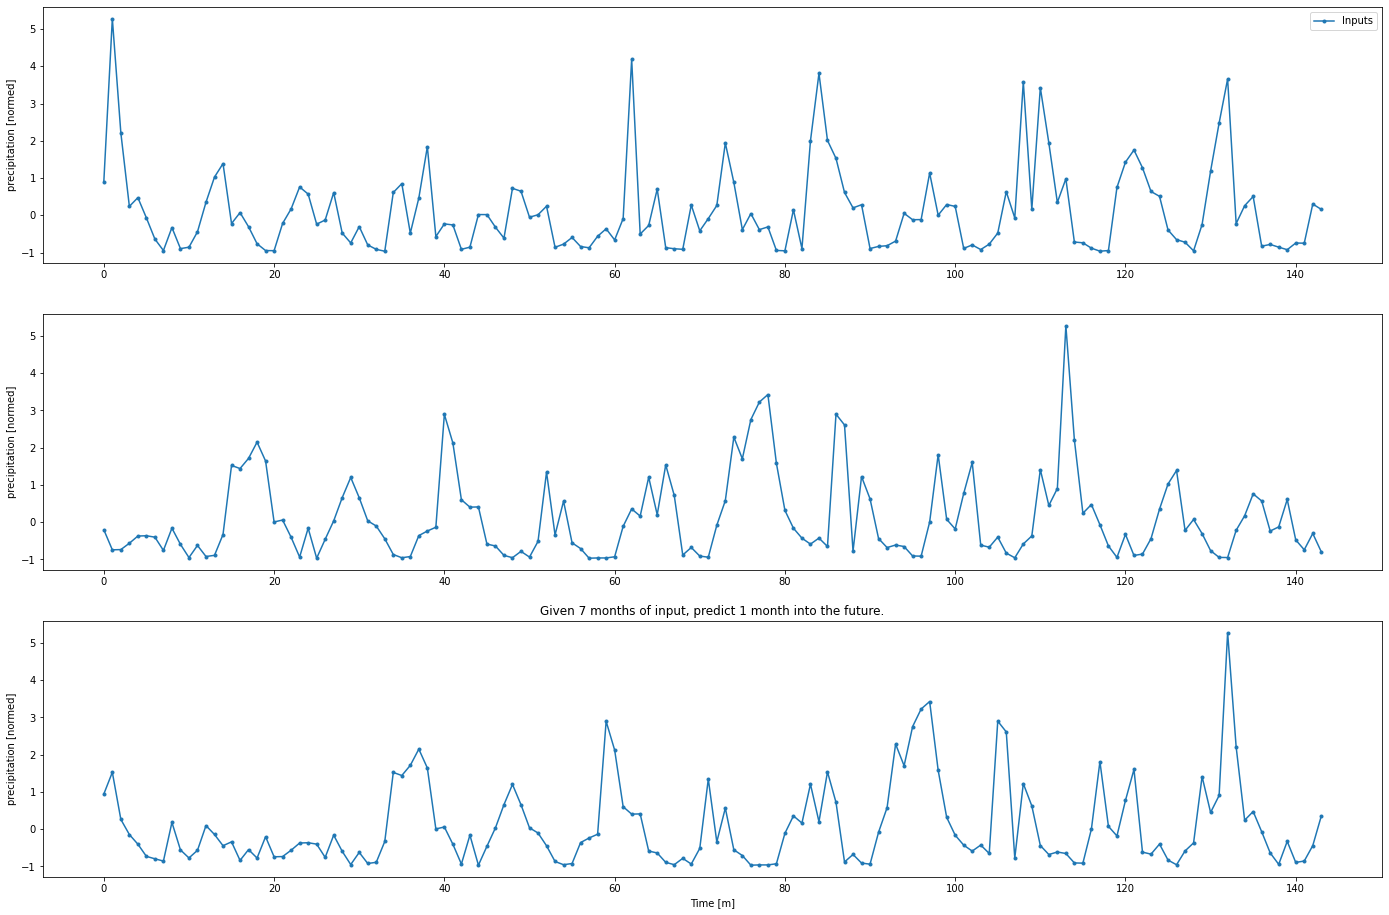

In [365]:
conv_window.plot()
plt.title("Given 7 months of input, predict 1 month into the future.")

In [ ]:
# # weights for each input

# plt.bar(x = range(len(train_df.columns)),
#         height=dense.layers[0].kernel[:,0].numpy())
# axis = plt.gca()
# axis.set_xticks(range(len(train_df.columns)))
# _ = axis.set_xticklabels(train_df.columns, rotation=90)

# Dense with RNN (LSTM)


In [368]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

In [370]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)

Input shape: (32, 120, 24)
Output shape: (32, 120, 1)


In [380]:
%time
wide_window = WindowGenerator(
    input_width=120, label_width=120, shift=1)

# lstm_model = tf.keras.models.Sequential([
#     # Shape [batch, time, features] => [batch, time, lstm_units]
#     tf.keras.layers.LSTM(32, return_sequences=True),
#     # Shape => [batch, time, features]
#     tf.keras.layers.Dense(units=num_features)
# ])

# history = compile_and_fit(lstm_model, wide_window)

# IPython.display.clear_output()
# val_performance['LSTM'] = lstm_model.evaluate( wide_window.val)
# performance['LSTM'] = lstm_model.evaluate( wide_window.test, verbose=0)

# print()

CPU times: user 15 µs, sys: 1e+03 ns, total: 16 µs
Wall time: 23.6 µs


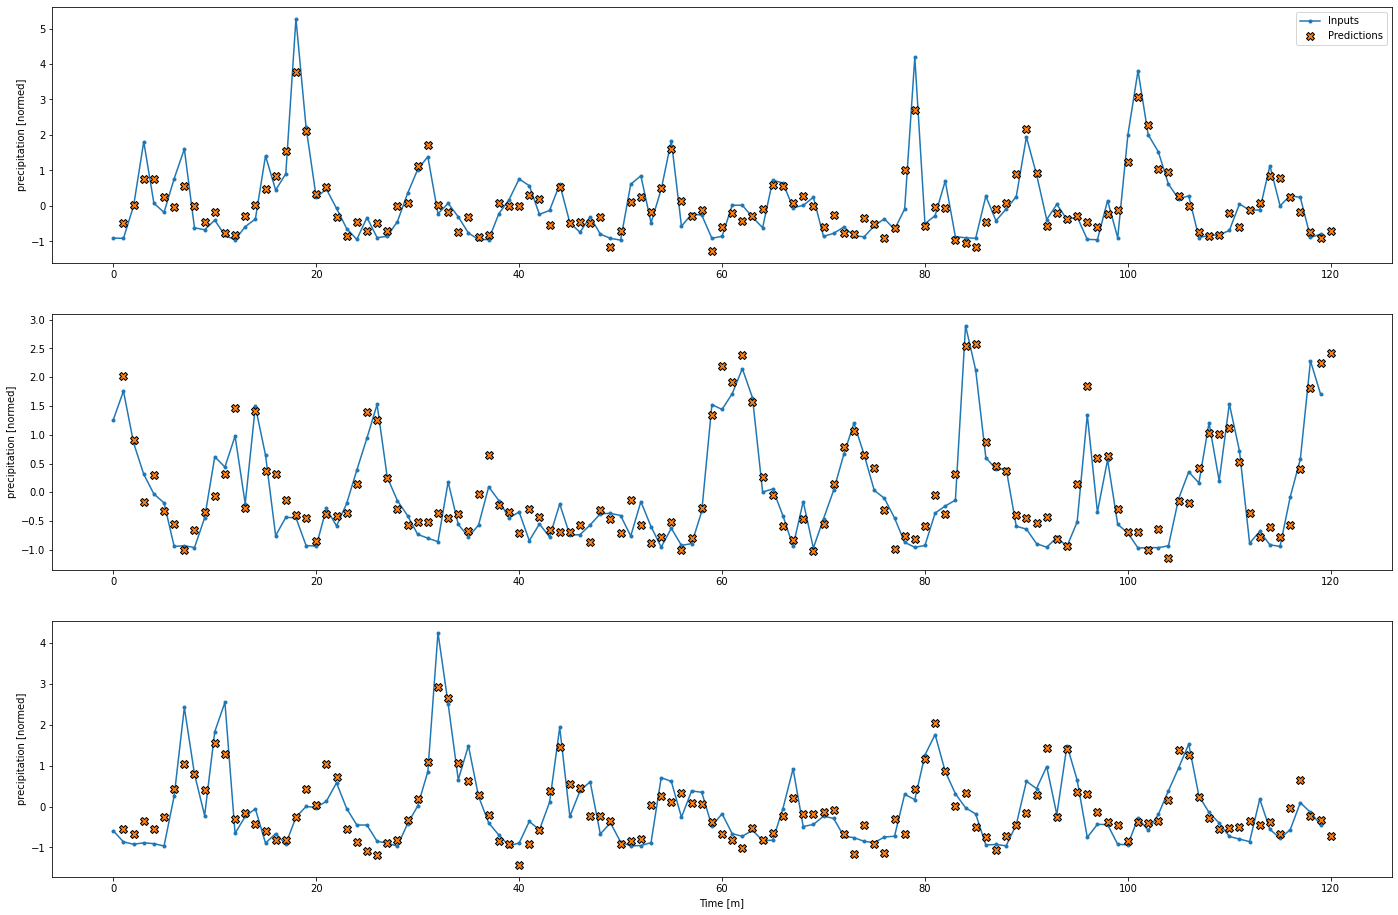

In [381]:
wide_window.plot(lstm_model)

In [ ]:
# # weights for each input

# plt.bar(x = range(len(train_df.columns)),
#         height=lstm_model.layers[0].kernel[:,0].numpy())
# axis = plt.gca()
# axis.set_xticks(range(len(train_df.columns)))
# _ = axis.set_xticklabels(train_df.columns, rotation=90)

In [393]:
w2 = WindowGenerator(input_width=24, label_width=12, shift=120,
                     label_columns=['precipitation'])
print(train_df[100:100+w2.total_window_size])
# # Stack three slices, the length of the total window.
# example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
#                            np.array(train_df[100:100+w2.total_window_size]),
#                            np.array(train_df[200:200+w2.total_window_size])])

# example_inputs, example_labels = w2.split_window(example_window)

# print('All shapes are: (batch, time, features)')
# print(f'Window shape: {example_window.shape}')
# print(f'Inputs shape: {example_inputs.shape}')
# print(f'Labels shape: {example_labels.shape}')

# w2.mywindow = example_inputs,example_labels
# w2

     precipitation  censo_long      espi  nina34_anom  nina4_anom       oni  \
100       0.399476    1.116779  0.451662     0.682699    0.673501  0.816932   
101       0.213743    0.402749  0.451662     0.547190    0.596441  0.697560   
102      -0.137704    0.030211  0.451662     0.287464    0.473145  0.614001   
103      -0.816130   -0.207799  0.451662     0.242294    0.349848  0.446881   
104      -0.591471   -0.031878  0.451662    -0.107771    0.334436  0.399132   
..             ...         ...       ...          ...         ...       ...   
239       0.102525    0.226828  0.451662     0.682699    1.166687  0.685623   
240       1.932051    0.816679  0.451662     0.569775    0.889270  0.542378   
241      -0.243361    0.785634  0.451662     0.479435    1.012567  0.339447   
242       0.382793    0.123346  0.451662     0.095493    0.581029  0.279761   
243       0.605228    0.392400  0.451662     0.163248    0.488557  0.160390   

        censo     meiv2  nina1_anom  nina3_anom  ..

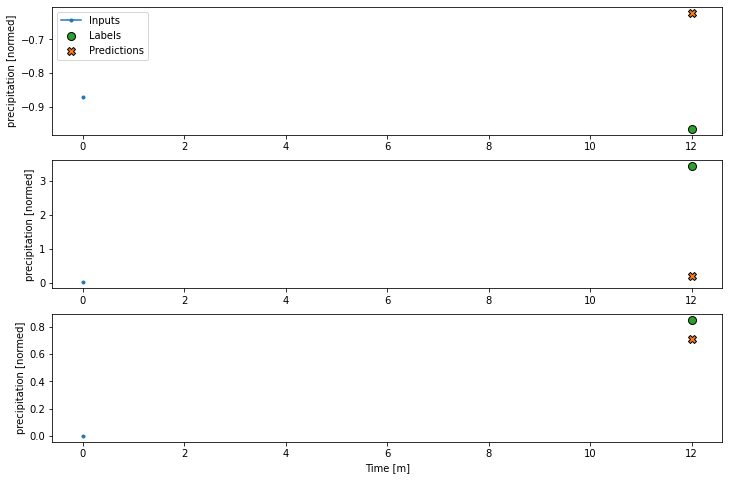

In [327]:
w2.test(lstm_model)